<a href="https://colab.research.google.com/github/srimoyeeegangz/ML-lab-codes/blob/main/2)_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded_house=files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
import pandas as pd
house_df = pd.read_csv('Housing.csv')
house_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print(house_df.isnull().sum())
print(house_df.dtypes)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
categorical_cols = house_df.select_dtypes(include=['object']).columns
house_df_encoded = pd.get_dummies(house_df, columns=categorical_cols)


In [ ]:
X = house_df_encoded.drop(columns=['price'])
y = house_df_encoded['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_lasso.fit(X_train, y_train)

print(f"Best alpha for Lasso: {grid_lasso.best_params_['alpha']}")
lasso_best = grid_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)


Best alpha for Lasso: 100


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_ridge.fit(X_train, y_train)

print(f"Best alpha for Ridge: {grid_ridge.best_params_['alpha']}")
ridge_best = grid_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)


Best alpha for Ridge: 10


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f'Lasso R²: {r2_lasso:.4f}')
print(f'Lasso MSE: {mse_lasso:.4f}')

# Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'Ridge R²: {r2_ridge:.4f}')
print(f'Ridge MSE: {mse_ridge:.4f}')


Lasso R²: 0.6529
Lasso MSE: 1754662110264.7925
Ridge R²: 0.6512
Ridge MSE: 1763228987266.5186


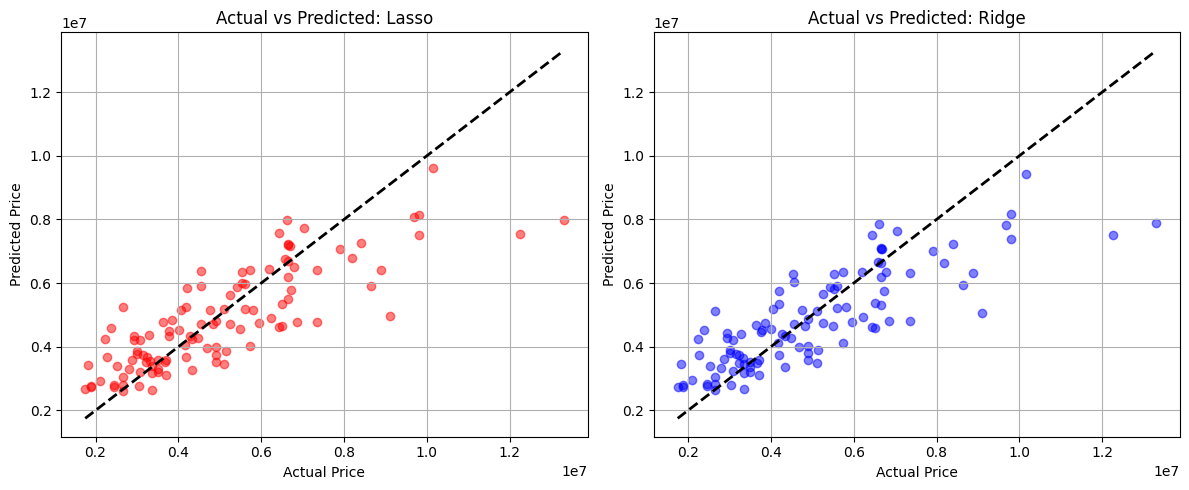

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Lasso subplot
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted: Lasso')
plt.grid(True)

# Ridge subplot
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted: Ridge')
plt.grid(True)

plt.tight_layout()
plt.show()
